In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/screentime_analysis.csv")

In [ ]:
df.head()

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


In [ ]:
df.describe()

,Usage (minutes),Notifications,Times Opened
count,200.000000,200.000000,200.00000
mean,37.750000,28.735000,21.63000
std,29.711299,35.801726,24.27301
min,1.000000,0.000000,1.00000
25%,17.000000,1.750000,4.00000
50%,26.000000,11.500000,10.00000
75%,51.250000,47.000000,32.00000
max,119.000000,147.000000,99.00000


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
Times = df.groupby("App")["Times Opened"].sum()

**Screen time over entire month**

In [ ]:
fig = go.Figure(go.Scatter(x = Times.index, y = Times.values))
fig.show()

Its a month analysis for a user

In [ ]:
df["Date"].dt.month_name().value_counts()

,count
Date,
August,200


**Analyzing screen time trends of all the apps over time**

In [ ]:
df.columns

Index(['Date', 'App', 'Usage (minutes)', 'Notifications', 'Times Opened',
       'Week'],
      dtype='object')

(array([19936., 19940., 19944., 19948., 19952., 19956., 19960., 19964.]),
 [Text(19936.0, 0, '2024-08-01'),
  Text(19940.0, 0, '2024-08-05'),
  Text(19944.0, 0, '2024-08-09'),
  Text(19948.0, 0, '2024-08-13'),
  Text(19952.0, 0, '2024-08-17'),
  Text(19956.0, 0, '2024-08-21'),
  Text(19960.0, 0, '2024-08-25'),
  Text(19964.0, 0, '2024-08-29')])

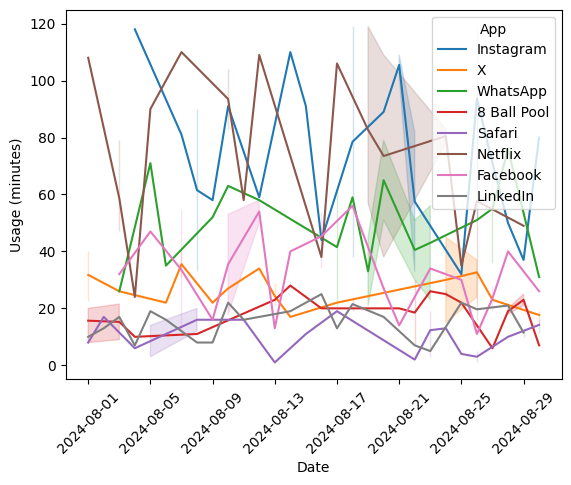

In [ ]:
sns.lineplot(x = "Date", y = "Usage (minutes)", hue = "App", data = df)
plt.ylabel('Usage (minutes)')
plt.xlabel('Date')
plt.xticks(rotation=45)

In [ ]:
df.columns

Index(['Date', 'App', 'Usage (minutes)', 'Notifications', 'Times Opened',
       'Week'],
      dtype='object')

- ***Is there any relationship between notifications and times opened?***

In [ ]:
df['Week'] = df['Date'].dt.isocalendar().week
times_week = df.groupby(["Week","App"])["Usage (minutes)"].sum()
times_week

Week  App        
31    8 Ball Pool    118
      Facebook        32
      Instagram      118
      LinkedIn        47
      Netflix        308
      Safari          31
      WhatsApp        26
      X              153
32    8 Ball Pool     11
      Facebook       201
      Instagram      353
      LinkedIn        89
      Netflix        445
      Safari          65
      WhatsApp       221
      X              142
33    8 Ball Pool     71
      Facebook       353
      Instagram      461
      LinkedIn       100
      Netflix        253
      Safari          31
      WhatsApp       283
      X              146
34    8 Ball Pool    155
      Facebook       132
      Instagram      447
      LinkedIn        51
      Netflix        591
      Safari          56
      WhatsApp       406
      X               60
35    8 Ball Pool     97
      Facebook       124
      Instagram      519
      LinkedIn       103
      Netflix        222
      Safari          87
      WhatsApp       268
      X              174
Name: Usage (minutes), dtype: int64

In [ ]:
data = df.pivot_table(index = "App", columns = "Week", values = "Times Opened", aggfunc = "sum")
data

Week,31,32,33,34,35
App,,,,,
8 Ball Pool,74,1,27,37,43
Facebook,20,194,191,162,188
Instagram,28,234,259,230,288
LinkedIn,20,34,28,14,23
Netflix,11,16,7,19,11
Safari,16,23,15,42,36
WhatsApp,89,287,401,622,307
X,62,54,56,35,122


Text(50.722222222222214, 0.5, 'App')

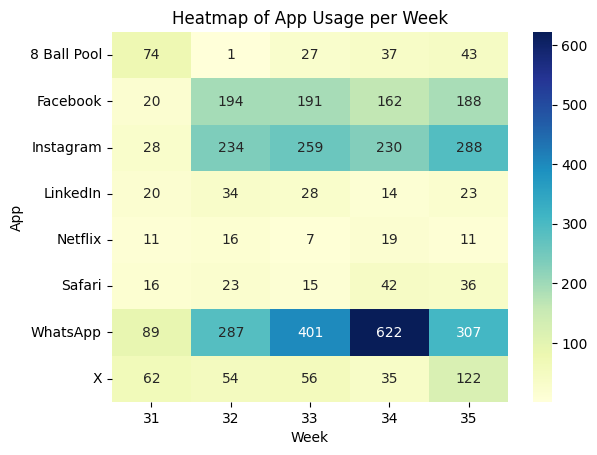

In [ ]:
sns.heatmap(data, annot = True, fmt = ".0f", cmap = "YlGnBu")
plt.title('Heatmap of App Usage per Week')
plt.xlabel('Week')
plt.ylabel('App')

<Figure size 800x600 with 0 Axes>

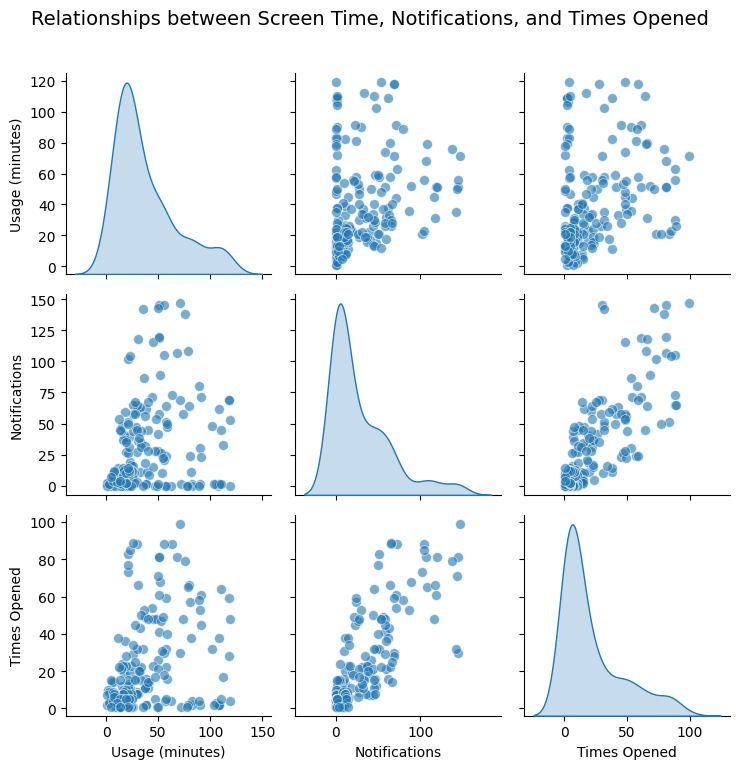

In [ ]:
plt.figure(figsize=(8, 6))

pairplot = sns.pairplot(
    df[['Usage (minutes)', 'Notifications', 'Times Opened']],
    kind="scatter",
    diag_kind="kde",
    plot_kws={'alpha':0.6, 's':50}
)

pairplot.fig.suptitle('Relationships between Screen Time, Notifications, and Times Opened', y=1.02, fontsize=14)

plt.tight_layout()

plt.show()

In [ ]:
df.columns

Index(['Date', 'App', 'Usage (minutes)', 'Notifications', 'Times Opened'], dtype='object')

In [ ]:
app_analysis = df.groupby("App").agg(avg_usage = ("Usage (minutes)","mean"),
              avg_notifications= ("Notifications","mean"),avg_times_opened = ("Times Opened","mean"))
app_analysis

,avg_usage,avg_notifications,avg_times_opened
App,,,
8 Ball Pool,18.08,4.52,7.28
Facebook,33.68,39.72,30.20
Instagram,75.92,49.80,41.56
LinkedIn,15.60,8.92,4.76
Netflix,72.76,0.44,2.56
Safari,10.80,0.72,5.28
WhatsApp,48.16,99.92,68.24
X,27.00,25.84,13.16


In [ ]:
app_analysis.sort_values(by = "avg_usage", ascending = True)

,avg_usage,avg_notifications,avg_times_opened
App,,,
Safari,10.80,0.72,5.28
LinkedIn,15.60,8.92,4.76
8 Ball Pool,18.08,4.52,7.28
X,27.00,25.84,13.16
Facebook,33.68,39.72,30.20
WhatsApp,48.16,99.92,68.24
Netflix,72.76,0.44,2.56
Instagram,75.92,49.80,41.56


In [ ]:
df["Day of week"] = df["Date"].dt.day_name()
week = df.groupby("Day of week")["Usage (minutes)"].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
fig5 = go.Figure(go.Bar(x = week.index, y= week.values, marker_color = "purple",text = week.values.round(2), textposition = "outside"))
fig5.show()

In [ ]:
times_week = df.groupby(["Day of week","App"])["Usage (minutes)"].mean()
times_week

Day of week  App        
Friday       8 Ball Pool     17.666667
             Facebook        35.333333
             Instagram       60.666667
             LinkedIn        12.750000
             Netflix         38.000000
             Safari          13.888889
             WhatsApp        42.400000
             X               18.750000
Monday       Facebook        41.500000
             Instagram       85.000000
             LinkedIn        19.500000
             Netflix         77.500000
             Safari           5.750000
             WhatsApp        49.200000
             X               33.000000
Saturday     8 Ball Pool     18.500000
             Facebook        34.333333
             Instagram       91.000000
             LinkedIn        17.333333
             Netflix         78.750000
             Safari          16.000000
             WhatsApp        42.500000
             X               27.000000
Sunday       8 Ball Pool     16.000000
             Facebook        43.000000
             Instagram       76.750000
             LinkedIn        17.600000
             Netflix         39.000000
             Safari           8.666667
             WhatsApp        59.000000
Thursday     8 Ball Pool     17.625000
             Instagram       61.000000
             LinkedIn         9.600000
             Netflix         78.500000
             Safari          10.600000
             WhatsApp        40.500000
             X               31.750000
Tuesday      8 Ball Pool     14.500000
             Facebook        22.800000
             Instagram       80.000000
             LinkedIn        16.500000
             Netflix         73.500000
             Safari           1.000000
             WhatsApp        55.000000
             X               23.600000
Wednesday    8 Ball Pool     21.500000
             Facebook        32.200000
             Instagram       90.400000
             LinkedIn        20.000000
             Netflix        110.000000
             Safari          10.000000
             WhatsApp        76.000000
             X               29.333333
Name: Usage (minutes), dtype: float64

**We found that top 3 apps used are insta,netflix,whatsapp**

In [ ]:
app_usage = df.groupby("App")["Usage (minutes)"].sum()
app_usage.nlargest(3)

,Usage (minutes)
App,
Instagram,1898
Netflix,1819
WhatsApp,1204


In [ ]:
daily_app_usage

,App,Day of Week,Usage (minutes)
0,Instagram,Monday,85.000000
1,Instagram,Tuesday,80.000000
2,Instagram,Wednesday,90.400000
3,Instagram,Thursday,61.000000
4,Instagram,Friday,60.666667
5,Instagram,Saturday,91.000000
6,Instagram,Sunday,76.750000
7,Netflix,Monday,77.500000
8,Netflix,Tuesday,73.500000
9,Netflix,Wednesday,110.000000


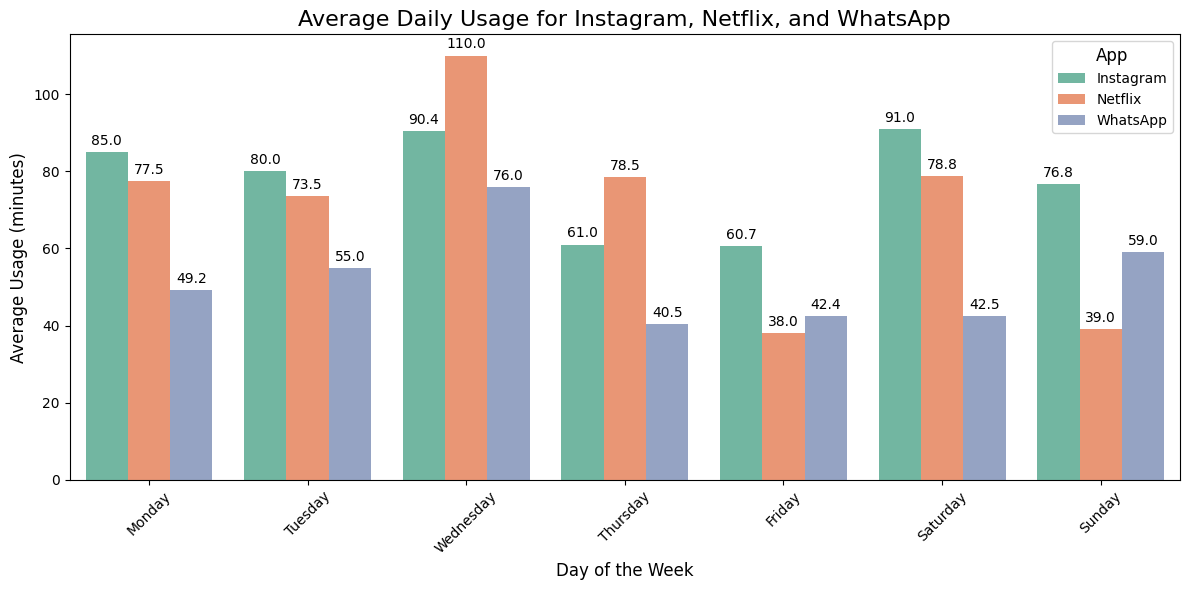

In [ ]:
top_apps_data = df[df['App'].isin(['Instagram', 'Netflix', 'WhatsApp'])]

daily_app_usage = top_apps_data.groupby(['App', 'Day of Week'])['Usage (minutes)'].mean().reindex(
    pd.MultiIndex.from_product([['Instagram', 'Netflix', 'WhatsApp'],
                                ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']],
                               names=['App', 'Day of Week'])).reset_index()

plt.figure(figsize=(12, 6))

ax = sns.barplot(x='Day of Week', y='Usage (minutes)', hue='App', data=daily_app_usage, palette='Set2')

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{height:.1f}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 8), textcoords='offset points')

plt.title('Average Daily Usage for Instagram, Netflix, and WhatsApp', fontsize=16)
plt.ylabel('Average Usage (minutes)', fontsize=12)
plt.xlabel('Day of the Week', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='App', fontsize=10, title_fontsize=12)

plt.tight_layout()
plt.show()